<a href="https://colab.research.google.com/github/Maryam-Elgohary/crop_recommendation/blob/main/crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn joblib

In [ ]:
# pandas is used for reading csv file
import pandas as pd

# numpy is the foundation of numerical computing in Python (بتتعامل مع الارقام والمعادلات الرياضية)
import numpy as np

# random is used to generate random values
import random

# matplotlib.pyplot is used for data visualization
import matplotlib.pyplot as plt

# Seaborn = Matplotlib but prettier + statistical visualizations
import seaborn as sns

# plotly.graph_objects is used for interactive visualization
import plotly.graph_objects as go

# plotly.express is a simple, high-level tool for creating fast and interactive visualizations directly from data.
import plotly.express as px

# make_subplots is used to create complex Plotly figures with multiple plots arranged in one layout.
from plotly.subplots import make_subplots

# train_test_split is used to split data into training and testing sets.
from sklearn.model_selection import train_test_split

# DecisionTreeClassifier is a machine learning model that predicts classes using a tree structure.
from sklearn.tree import DecisionTreeClassifier

# metrics provides functions to measure the performance of machine learning models.
from sklearn import metrics

# cross_val_score is used to evaluate a model's performance using cross-validation.
from sklearn.model_selection import cross_val_score

# confusion_matrix shows how many predictions were correct or incorrect for each class.
from sklearn.metrics import confusion_matrix

# SVC (Support Vector Classifier) is a model that separates classes with a hyperplane.
from sklearn.svm import SVC

# LogisticRegression is a model used for binary or multiclass classification problems.
from sklearn.linear_model import LogisticRegression

# RandomForestClassifier combines many decision trees to improve classification accuracy.
from sklearn.ensemble import RandomForestClassifier

## ***Get the Data***

In [ ]:
# r --> raw string
# read .csv file --> store its data in a variable (data)
data = pd.read_csv(r"/content/sample_data/Crop_recommendation.csv")

# display the first 5 rows in the dataframe
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## **Data Discovering**

In [ ]:
# display information about the dataframe (number of rows and columns, columns' names, data types, number of non-null values, memory usage)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# display a statistical summary for the numerical columns (count, mean, std, min, max, quarters)
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# display a dataframe with the same size and give a value for each column (true if it contains null value and false if not)
data.isnull().any()

,0
N,False
P,False
K,False
temperature,False
humidity,False
ph,False
rainfall,False
label,False


In [ ]:
# data.shape: return a tuple with the number of rows and columns
print("Data shape: ", data.shape)

Data shape:  (2200, 8)


In [ ]:
# return the number of unique values (crops) in the label column
cropNames = data['label'].unique()
print("Number of crop names = ", len(cropNames))

Number of crop names =  22


In [ ]:
print("Crop names are ", cropNames)

Crop names are  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
# count the number of each value in the label column
data['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
# count the mean for all the numerical values for each crop
cropMeanValue = pd.pivot_table(data, index=['label'], aggfunc='mean')
cropMeanValue.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


## **Elements Analysis**

In [ ]:
colorArray = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d', '#127800', '#a8812c', '#027da6', '#3d6636']

In [ ]:
# values: dataframes
# code: column or feature that we will working on
# name: element name that will appear
def analyzeElements(values, code, name):
  # make a subplot with 2 columns in one row to display the highest 10 values and lowest 10 values
  fig = make_subplots(rows=1, cols=2)

# the highest 10 values
# x: values
# y: crop names
  top = {
      'y' : values[code][0:10].sort_values().index,
      'x' : values[code][0:10].sort_values()
  }

# the lowest 10 values
  last = {
      'y' : values[code][-10:].index,
      'x' : values[code][-10:]
  }

# add trace (drawings)
  fig.add_trace(
      go.Bar(top,
            name="Most "+name+" required",
            marker_color=random.choice(colorArray),
            orientation='h',
            text=top['x']),

      row=1, col=1
  )

  fig.add_trace(
      go.Bar(last,
            name="Least "+name+" required",
            marker_color=random.choice(colorArray),
            orientation='h',
            text=last['x']),
      row=1, col=2
  )

  # Edit the trace color, labels, size, etc...
  fig.update_traces(texttemplate='%{text}', textposition='inside')
  fig.update_layout(title_text=name,
                    plot_bgcolor='white',
                    font_size=12,
                    font_color='black',
                  height=500)

  fig.update_xaxes(showgrid=False)
  fig.update_yaxes(showgrid=False)
  fig.show()

 **Nitrogen Analysis**

In [ ]:
Nitrogen = cropMeanValue.sort_values(by='N', ascending=False)
analyzeElements(Nitrogen, 'N', "Nitrogen")

**Phosphorus Analysis**

In [ ]:
Phosphorus=cropMeanValue.sort_values(by='P', ascending=False)
analyzeElements(Phosphorus,'P', "Phosphorus")

**Potassium Analysis**

In [ ]:
Potassium=cropMeanValue.sort_values(by='K', ascending=False)
analyzeElements(Potassium, 'K', "Potassium")

# **Ratio of elements for some crops**

In [ ]:
# make a pie chart for each crop's elements ratios
# name: target crop name
#
def plotElementRatio(name):
    labels = ['Nitrogen(N)','Phosphorous(P)','Potasium(K)']
    # get the correct row for the target crop
    elementNPK = cropMeanValue[cropMeanValue.index==name]
    sizes = [elementNPK['N'].iloc[0], elementNPK['P'].iloc[0], elementNPK['K'].iloc[0]]

    # figure size
    fig, ax = plt.subplots(figsize=(5, 5))
    # draw the pie chart
    # autopct='%1.1f%%' --> write the ratio on each piece
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ffb3dd', '#99ddff', '#aaff94'])
    # figure label with the crop name
    plt.title(name)
    plt.show()

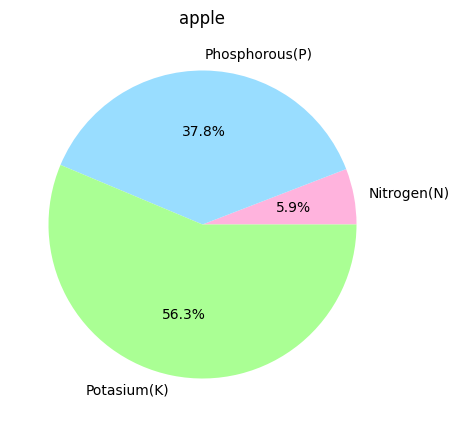

In [ ]:
plotElementRatio('apple')

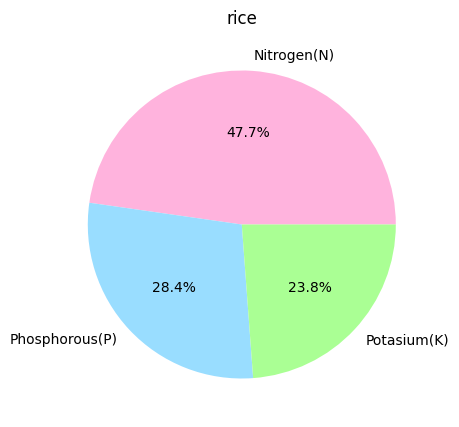

In [ ]:
plotElementRatio('rice')

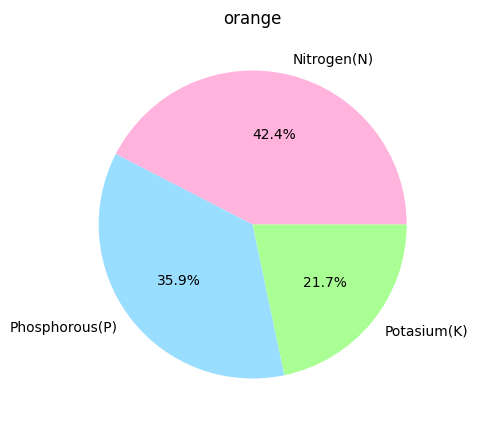

In [ ]:
plotElementRatio('orange')

# **Comparision between rainfall, temperature and humidity**

In [ ]:
# interactive barchart using plotly.express
fig = px.bar(cropMeanValue, x=cropMeanValue.index, y=["rainfall", "temperature", "humidity"], color_discrete_map={
        'rainfall': '#1f77b4',
        'temperature': 'darkgray',
        'humidity':'goldenrod'
    })
# remove grid
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

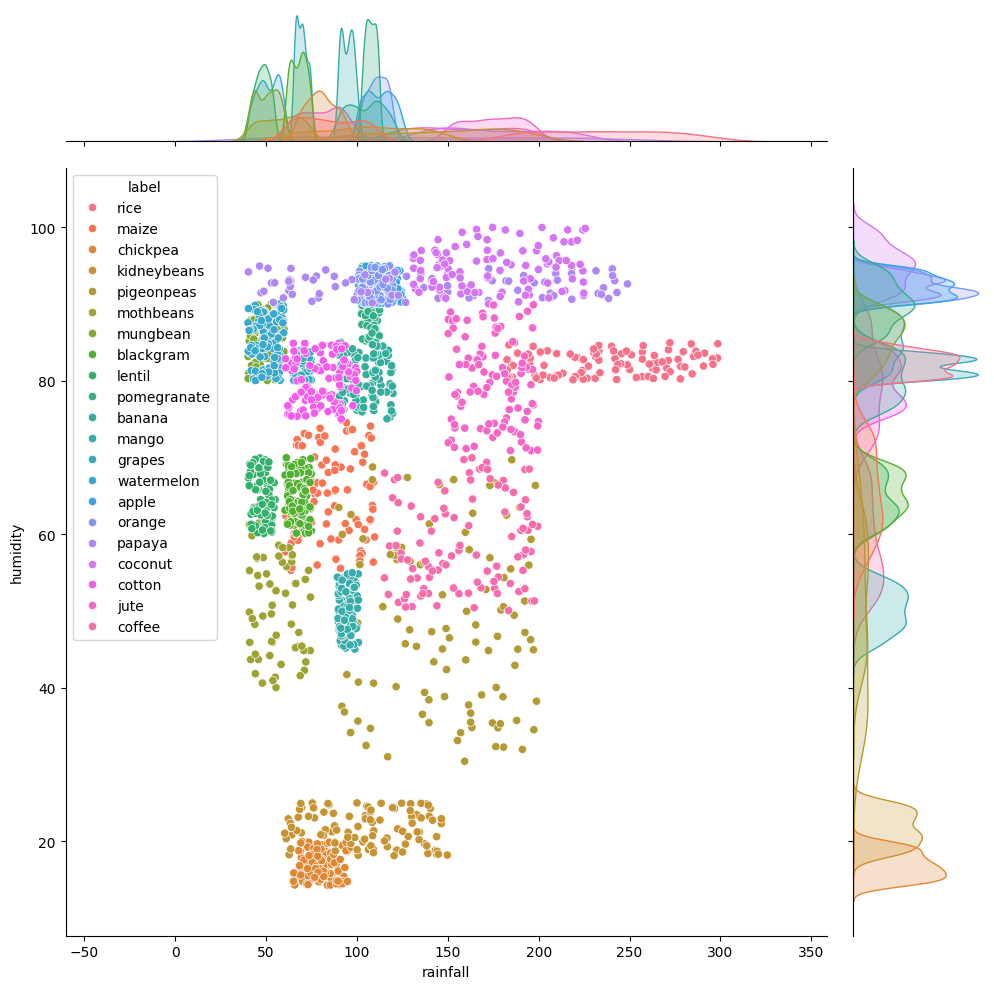

In [ ]:
# jointplot = histogram + scatter plot
# (data['temperature']<40) & (data['rainfall']>40) --> use data for teamperature less than 40 & rainfall more than 40
sns.jointplot(x="rainfall",y="humidity",data=data[(data['temperature']<40) &
                                                  (data['rainfall']>40)],height=10,hue="label")

# **Correlation between features**

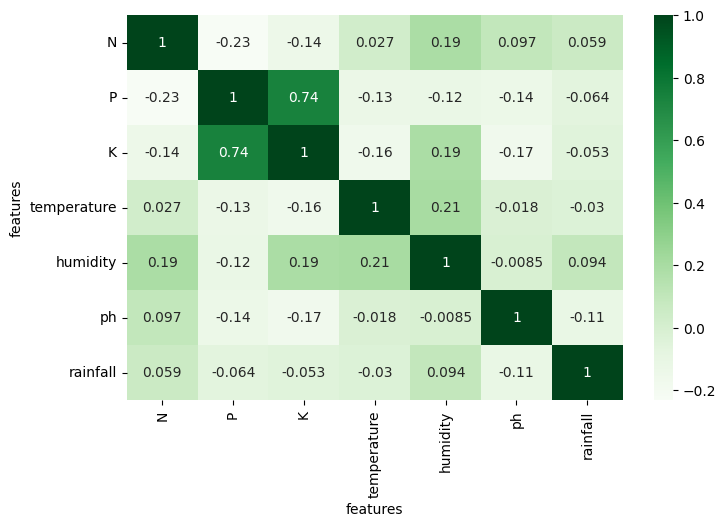

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
# data.select_dtypes(include=np.number) --> choose the numerical columns
# .corr(): calculate the correlation between each column and another column
# annot=True --> calculate the values of correlation in each cell
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap="Greens")
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.show()

# **Clean copy & remove duplicates**

In [ ]:
# remove duplicates
df = data.drop_duplicates().reset_index(drop=True)
print("Data after removing duplicates:", df.shape)

Data after removing duplicates: (2200, 8)


# **Split features and label**

In [ ]:
X = df.drop(columns=['label'])
y = df['label']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2200, 7)
y shape: (2200,)


# **Encode the label (turn crop names into numbers)**

In [ ]:
# convert object datatype into numerical datatypes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)
print("Classes:", le.classes_)

Classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


# **Split dataset into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
# x --> features
# y_enc --> target
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42
)
print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (1760, 7)
Test: (440, 7)


# **Scale numeric features (important for SVM / Logistic / etc.)**

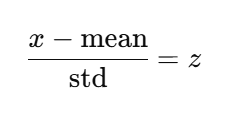

In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = X.columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])
print("Scaling done successfully!")

Scaling done successfully!


# **Choosing the model**

In [ ]:
trainAccList = []
validationAccList = []
modelList = []

**Random Forest**

In [ ]:
# 1) Define and train model
RandomForestClf = RandomForestClassifier(random_state=0)
RandomForestClf.fit(X_train_scaled, y_train)

# 2) Train accuracy
RandomForestTrainAcc = RandomForestClf.score(X_train_scaled, y_train)

# 3) Predictions on test set
RandomForestPreds = RandomForestClf.predict(X_test_scaled)

# 4) Validation accuracy (test accuracy)
RandomForestValAcc = metrics.accuracy_score(y_test, RandomForestPreds)

# 5) Lists (optional)
trainAccList.append(RandomForestTrainAcc * 100)
validationAccList.append(RandomForestValAcc * 100)
modelList.append('RandomForestClf')

# 6) Print results
print("     Random Forest Train Accuracy       = ", RandomForestTrainAcc * 100)
print("     Random Forest Test Accuracy        = ", RandomForestValAcc * 100)
print("--------------------------------------------------------------")
print(metrics.classification_report(y_test, RandomForestPreds))

     Random Forest Train Accuracy       =  100.0
     Random Forest Test Accuracy        =  99.31818181818181
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14    

In [ ]:
score = cross_val_score(RandomForestClf, X_train_scaled, y_train, cv=5)
print('Cross validation scores: ', score)
print('Average CV score: ', score.mean())

Cross validation scores:  [0.98863636 1.         0.99431818 0.99715909 0.99431818]
Average CV score:  0.9948863636363636


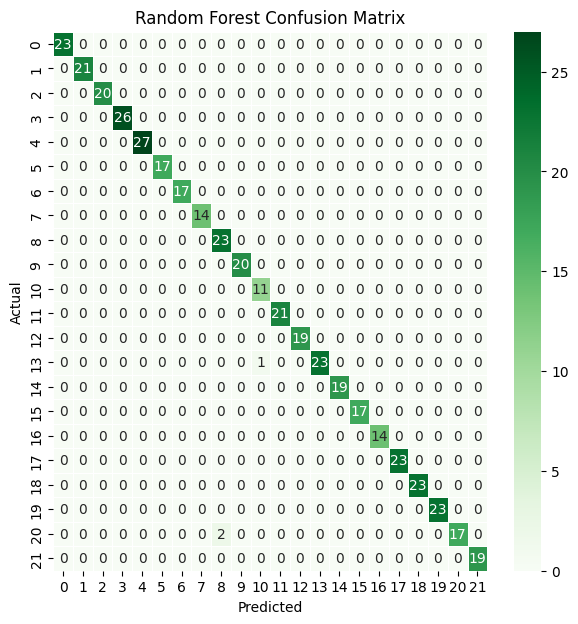

In [ ]:
# Confusion Matrix
confusionMatrixRF = confusion_matrix(y_test, RandomForestPreds)

# Plot
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusionMatrixRF, annot=True, linewidth=0.5, fmt=".0f", cmap='Greens', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Random Forest Confusion Matrix')
plt.show()

**SVM**

In [ ]:
# Train the SVM model
SVM = SVC(gamma='auto')
SVM.fit(X_train_scaled, y_train)

# Train Accuracy
SVMtrainAcc = SVM.score(X_train_scaled, y_train)

# Predictions on TEST set
SVMPreds = SVM.predict(X_test_scaled)

# Test Accuracy
SVMvalAcc = metrics.accuracy_score(y_test, SVMPreds)

# Save results (optional)
trainAccList.append(SVMtrainAcc * 100)
validationAccList.append(SVMvalAcc * 100)
modelList.append('SVM')

# Print results
print("     SVM Train Accuracy       = ", SVMtrainAcc * 100)
print("     SVM Test Accuracy        = ", SVMvalAcc * 100)
print("--------------------------------------------------------------")
print(metrics.classification_report(y_test, SVMPreds, zero_division=0))

     SVM Train Accuracy       =  98.80681818181817
     SVM Test Accuracy        =  96.81818181818181
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.78      0.91      0.84        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00 

In [ ]:
# Cross-validation (5 folds)
score = cross_val_score(SVM, X_train_scaled, y_train, cv=5)
print('Cross validation scores: ', score)
print('Average CV score: ', score.mean())

Cross validation scores:  [0.98011364 0.98295455 0.98295455 0.99147727 0.98579545]
Average CV score:  0.984659090909091


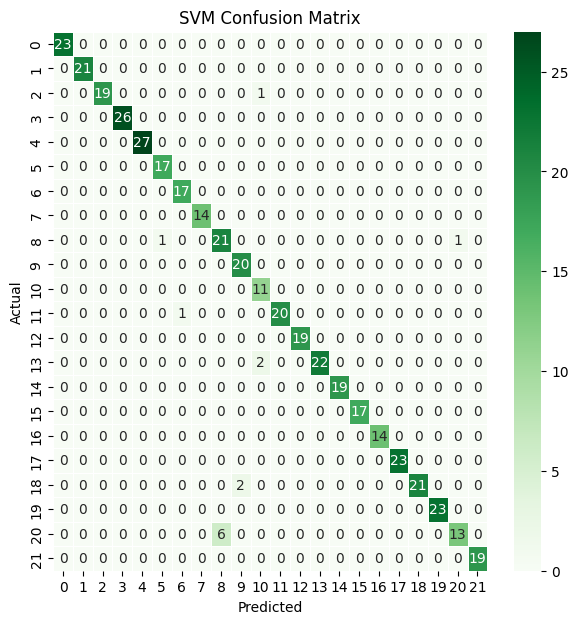

In [ ]:
# Confusion Matrix
confusionMatrixSVM = confusion_matrix(y_test, SVMPreds)

# Plot
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusionMatrixSVM, annot=True, linewidth=0.5, fmt=".0f", cmap='Greens', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('SVM Confusion Matrix')
plt.show()

**Logistic Regression**

In [ ]:
# Train the Logistic Regression model
logReg = LogisticRegression(random_state=2, max_iter=3000, solver='saga')
logReg.fit(X_train_scaled, y_train)

# Train Accuracy
logRegTrainAcc = logReg.score(X_train_scaled, y_train)

# Predictions on TEST set
logRegPreds = logReg.predict(X_test_scaled)

# Test Accuracy
logRegValAcc = metrics.accuracy_score(y_test, logRegPreds)

# Save results (optional)
trainAccList.append(logRegTrainAcc * 100)
validationAccList.append(logRegValAcc * 100)
modelList.append('logReg')

# Print results
print("     Logistic Regression Train Accuracy       = ", logRegTrainAcc * 100)
print("     Logistic Regression Test Accuracy        = ", logRegValAcc * 100)
print("--------------------------------------------------------------")
print(metrics.classification_report(y_test, logRegPreds, zero_division=0))

     Logistic Regression Train Accuracy       =  97.7840909090909
     Logistic Regression Test Accuracy        =  96.36363636363636
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96    

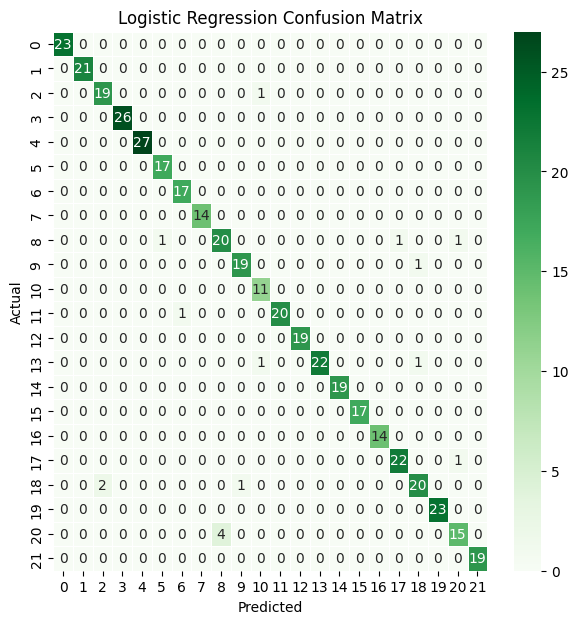

In [ ]:
# Confusion Matrix
confusionMatrixLR = confusion_matrix(y_test, logRegPreds)

# Plot
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusionMatrixLR, annot=True, linewidth=0.5, fmt=".0f", cmap='Greens', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Logistic Regression Confusion Matrix')
plt.show()

**Decision Tree**

In [ ]:
# Train the Decision Tree model
decisionTreeClf = DecisionTreeClassifier(random_state=42)
decisionTreeClf.fit(X_train_scaled, y_train)

# Train Accuracy
decisionTreeTrainAcc = decisionTreeClf.score(X_train_scaled, y_train)

# Predictions on TEST set
decisionTreePreds = decisionTreeClf.predict(X_test_scaled)

# Test Accuracy
decisionTreeValAcc = metrics.accuracy_score(y_test, decisionTreePreds)

# Save results
trainAccList.append(decisionTreeTrainAcc * 100)
validationAccList.append(decisionTreeValAcc * 100)
modelList.append('decisionTreeClf')

# Print results
print("     Decision Tree Train Accuracy       = ", decisionTreeTrainAcc * 100)
print("     Decision Tree Test Accuracy        = ", decisionTreeValAcc * 100)
print("--------------------------------------------------------------")
print(metrics.classification_report(y_test, decisionTreePreds, zero_division=0))

     Decision Tree Train Accuracy       =  100.0
     Decision Tree Test Accuracy        =  98.63636363636363
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14    

In [ ]:
# Cross-validation (5 folds)
score = cross_val_score(decisionTreeClf, X_train_scaled, y_train, cv=5)

print('Cross validation scores: ', score)
print('Average CV score: ', score.mean())

Cross validation scores:  [0.98295455 0.98579545 0.98011364 0.99715909 0.98011364]
Average CV score:  0.9852272727272726


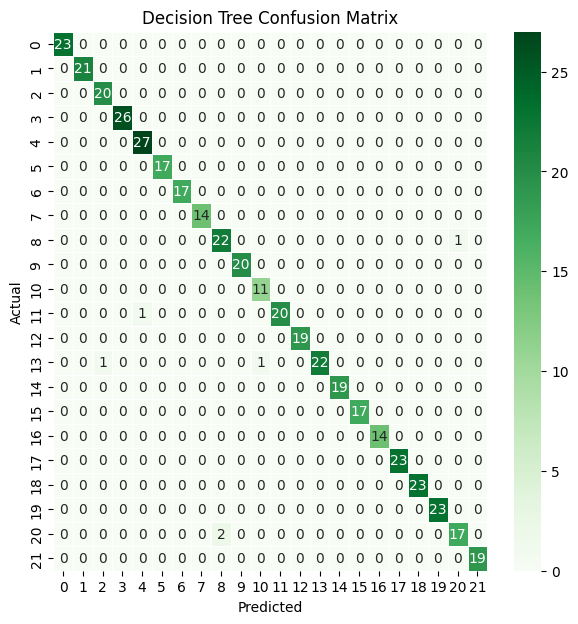

In [ ]:
# Confusion Matrix
confusionMatrixDT = confusion_matrix(y_test, decisionTreePreds)

# Plot
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusionMatrixDT, annot=True, linewidth=0.5, fmt=".0f", cmap='Greens', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Decision Tree Confusion Matrix')
plt.show()

# **Pros & Cons**
**Random Forest Classifier**
- quite fast
- able to deal with unbalanced and missing data
- may over-fit data sets that are particularly noisy
- data-hungry

**SVM**
- clear margin of separation between classes
- more effective in high dimensional spaces
- effective in cases where the number of dimensions is greater than the number of samples
- memory efficient
- not suitable for large data sets

**Logistic Regression**
- simple
- not effecient when not lineary seperable features
- sensetive to outliers

**DecisionTreeClassifier**
- does not require normalization of data
- does not require scaling of data as well
- higher time to train the model

# **Accuracy Comparison**

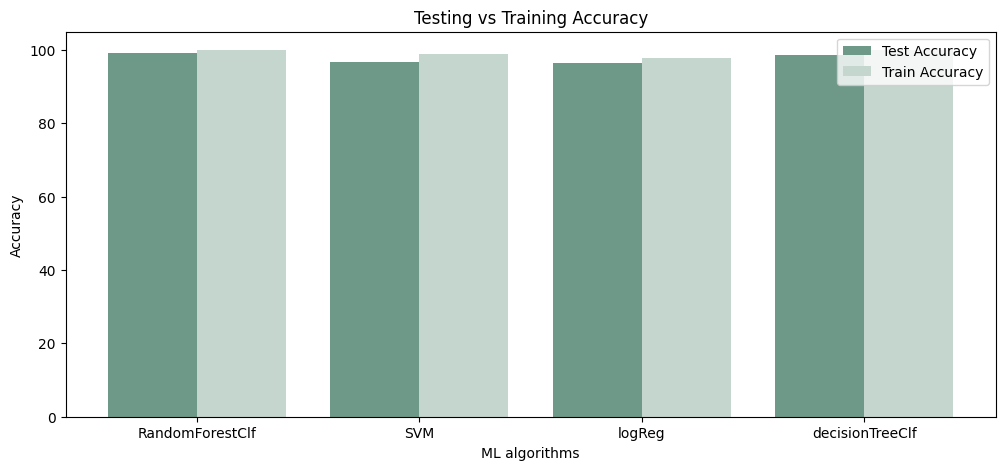

In [ ]:
f, ax = plt.subplots(figsize=(12, 5))
X_axis = np.arange(len(modelList))
plt.bar(X_axis - 0.2, validationAccList, 0.4, label = 'Test Accuracy', color=('#6e9989'))
plt.bar(X_axis + 0.2, trainAccList, 0.4, label = 'Train Accuracy', color=('#c5d6cf'))
plt.xticks(X_axis, modelList)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.savefig('cropRecommendation.png')
plt.show()

# **Testing**

In [ ]:
# 1️⃣ Define the new test data
test_data = pd.DataFrame([[16, 12, 43, 3, 75, 5.5, 100]],
                         columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# 2️⃣ Scale the test data using the same scaler from training
test_data_scaled = scaler.transform(test_data)

# 3️⃣ Predict using the trained Random Forest model
test_pred_num = RandomForestClf.predict(test_data_scaled)

# 4️⃣ Convert numeric prediction back to original label
test_pred_text = le.inverse_transform(test_pred_num)

# 5️⃣ Print the final output
print("Test Output:", test_pred_text,"\n\n\n -----------------------------------------")


Test Output: ['pomegranate'] 


 -----------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
import joblib

# save the training model
joblib.dump(RandomForestClf, 'crop_model.pkl')

# reuse the model
model = joblib.load('crop_model.pkl')

In [ ]:
# fastapi_crop.py
# تشغيل السيرفر:
#pip install fastapi uvicorn joblib pandas scikit-learn

# python -m uvicorn app_backend:app --reload

from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd
from fastapi.middleware.cors import CORSMiddleware

# انشاء تطبيق FastAPI
app = FastAPI(title="Crop Recommendation API")

# تفعيل CORS عشان Flutter يقدر يتواصل
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # أو حطي IP المحاكي/الهاتف بدل "*"
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# تحميل الموديل
model = joblib.load("/content/crop_model.pkl")  # ملف النموذج عندك

# تعريف شكل البيانات اللي اليوزر هيدخلها
class Crop(BaseModel):
    N: int
    P: int
    K: int
    temperature: float
    humidity: float
    ph: float
    rainfall: float

# endpoint للتنبؤ بالمحصول
@app.post("/predict")
def predict_crop(crop: Crop):
    # تحويل البيانات ل DataFrame
    features = pd.DataFrame([crop.model_dump()])

    # التنبؤ بالمحصول
    prediction = model.predict(features)

    # ارجاع النتيجة
    return {"recommended_crop": str(prediction[0])}